# Putting the p-value in Context

Neuroscience researchers typically report p-values to express the strength of statistical evidence; but p-values are not sufficient on their own to understand the meaning and value of a scientific inference. In this unit, learners will learn how to interpret the p-value, how to express the size of an effect and uncertainty about a result, and how to interpret results at both the individual and population levels.

<div class="alert alert-block alert-danger">
<b>Alert:</b> If you're running this on <b>Google Colab</b>, then uncomment and run the next two cells.
</div>

In [1]:
# !git clone https://github.com/Mark-Kramer/METER-Units.git

In [2]:
# import sys
# sys.path.insert(0,'/content/METER-Units')

## 1 - Here’s some data, give me the p’s!

In [3]:
# Load modules
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
# import statsmodels.api as sm
# from tqdm import tqdm
# from matplotlib.colors import ListedColormap
# Load custom functions
from pvalue_functions import *

<div class="alert alert-block alert-info">

*Introduction*:
- Your lab collects an EEG biomarker of memory ([spindle rate](https://en.wikipedia.org/wiki/Sleep_spindle)) from N=30 human subjects.
- To do so, your lab measures the spindle rate twice per minute. Your lab has a [reliable detector](https://github.com/Mark-Kramer/Spindle-Detector-Method) to find spindles; this detector is known to be accurate outside of treatment. We expect it to still work during treatment, but we also expect more variability in the spindles (hence more variability in the detections) during treatment.
- Your lab measures spindle rate during two conditions:
    - **During Treatment**: Data collection during a 10 minute intervention, resulting in 20 samples of spindle rate for each subject.
    - **Post-treatment**: Data collection after intervention lasts 7 hours, while the subject sleeps, resulting in 840 samples of spindle rate for each subject.

- Each sample is relative to the subject's baseline spindle rate (i.e., it’s 0 mean). So values greater than 0 indicate an increase in spindle rate relative to baseline.
  
-  Your PI says: *I want to know if there’s an effect of treatment in each human. **Give me the p’s!***

</div>

<div class="alert alert-block alert-success">

**Q:** What does the PI mean by *"Give me the p's"*?

**A:** (Short answer - word cloud ...)
</div>

<div class="alert alert-block alert-success">

**Q:** Exercise that asks about the appropriateness of p-values for different types of research questions would be good to build intuition around exactly what they are for.

**A:** (Goal is to build intition for what a p-value means.)
</div>

<div class="alert alert-block alert-success">

**Q:** Have you ever computed a p-value (in software)?

**A:** (Survey)
</div>

## 2- Let’s do it: Define & compute p-values.


Let's start by considering answers to these two questions:

- What does a p-value test?

  Sometimes statisticians think backwards. We'd like to know how the spindle rate changes relative to baseline. To test this, we'll start by assuming the opposite: we'll hypothesize that the spindle rate does not change. This is called the **null hypothesis**. The p-value indicates how much evidence we have to reject the null hypothesis given the data we observe. It's like a measure of surprise. If we're surprised by the observed data, then we'll reject the null hypothesis, and conclude we have evidence that the spindle rate changes relative to baseline.

  Alternatively, if we're not surprised by the observed data, then we'll conclude that we lack sufficient evidence to reject the null hypothesis. There's an important subtely here that statisicians like to point out - when we're testing this weay, we never accept the null hypothesis. Instead, the best we can do is talk like a statistican and say things like "we fail to reject the null hypothesis".

- What does p<0.05 mean?


Let's now return to the human data. First, let's consi the null hypothesis the PI wants to test.

<div class="alert alert-block alert-success">

**Q:** The PI says *“I expect that during treatment the spindle rate > 0.”* What is the null hypothesis?

**A:** (Multiple Choice)

Correct ansewr: Mean spindle rate during treatment = 0.

</div>

<div class="alert alert-block alert-success">

**Q:** The PI says *“I expect that post-treatment the spindle rate is not different from the baseline spindle rate.”* What is the null hypothesis?

**A:** (Multiple Choice)

Correct ansewr: Mean spindle rate post-treatment = 0.

</div>

Now, let's load the data and compute the p-values.

In [4]:
during_treatment, post_treatment = load_data()

Let's start by investigating the structure of the data.

In [5]:
print(during_treatment.shape)
print(post_treatment.shape)

(30, 20)
(840, 20)


Both `during_treatment` and `post_treatment` consist of observations from 20 subjects (the number of columns). We collect 30 samples during treatment and 840 samples after treatment (the number of rows).

You might think of these variables as rectangles (or matrices), where each row indicates a sample of spindle rate, and each column indicates a subject:

![title](IMG_Pvalue/simple_boxes_during_and_post.jpg)

Let's now compute the p-values during treatment:

In [6]:
result = stats.ttest_1samp(during_treatment,popmean=0,alternative='greater')
p_value_during = result.pvalue

result = stats.ttest_1samp(post_treatment,  popmean=0,alternative='greater')
p_value_post   = result.pvalue

Let's investigate the shape of these results:

In [7]:
print(p_value_during.shape)
print(p_value_post.shape)

(20,)
(20,)


<div class="alert alert-block alert-success">

**Q:** Do these shapes make sense?

**A:** Yes, there's one p-value per subject, and we have 20 subjects.

</div>

Let's print the p-values for each subject, for both conditions:

Let's also plot the p-values for both conditions:

In [8]:
for k in np.arange(0,20):
    print('Subject ', k, ', During p=', np.array2string(p_value_during[k], precision=5), ',  Post p=', np.array2string(p_value_post[k], precision=5))

Subject  0 , During p= 0.25882 ,  Post p= 0.00076
Subject  1 , During p= 0.44433 ,  Post p= 0.00036
Subject  2 , During p= 0.3167 ,  Post p= 0.00593
Subject  3 , During p= 0.11148 ,  Post p= 0.00098
Subject  4 , During p= 0.00319 ,  Post p= 0.00052
Subject  5 , During p= 0.15482 ,  Post p= 0.00243
Subject  6 , During p= 0.00621 ,  Post p= 7.93688e-06
Subject  7 , During p= 0.49721 ,  Post p= 0.20865
Subject  8 , During p= 0.04499 ,  Post p= 0.02699
Subject  9 , During p= 0.13023 ,  Post p= 0.01229
Subject  10 , During p= 0.03545 ,  Post p= 0.18303
Subject  11 , During p= 0.0698 ,  Post p= 1.83867e-07
Subject  12 , During p= 0.0085 ,  Post p= 1.35552e-05
Subject  13 , During p= 0.05839 ,  Post p= 0.00038
Subject  14 , During p= 0.09546 ,  Post p= 0.00127
Subject  15 , During p= 0.367 ,  Post p= 3.20062e-06
Subject  16 , During p= 0.15044 ,  Post p= 1.26967e-07
Subject  17 , During p= 0.23197 ,  Post p= 0.00036
Subject  18 , During p= 0.02497 ,  Post p= 0.02294
Subject  19 , During p= 0.

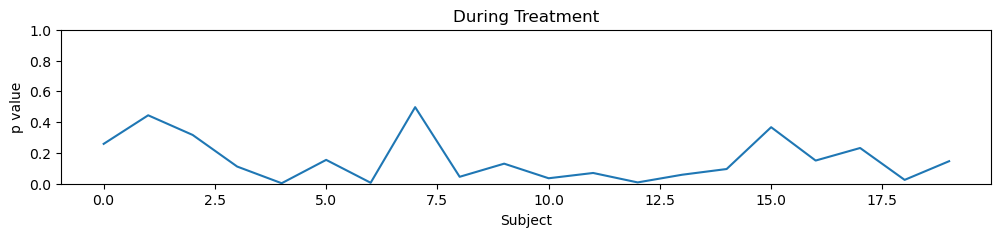

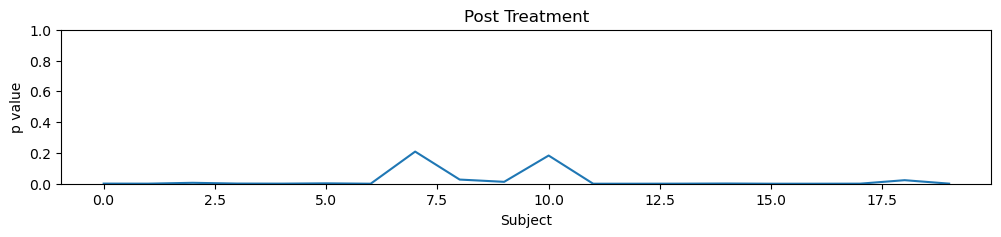

In [9]:
# Plot the spiking from an example neuron.
plt.figure(figsize=(12, 2))
plt.plot(p_value_during);
plt.xlabel('Subject'); plt.ylabel('p value'); plt.title('During Treatment'); plt.ylim([0,1]);
plt.figure(figsize=(12, 2))
plt.plot(p_value_post);
plt.xlabel('Subject'); plt.title('Post Treatment'); plt.ylabel('p value'); plt.ylim([0,1]);

<div class="alert alert-block alert-success">

**Q:** Let's first interpert the plots of p-values. What do you see?

**A:** The p-values are much smaller post-treatment, compared to during treatment.

</div>

Now, do we have evidence to reject the null hypothesis?

If we perform one statistical test, then we typically reject the null hypothesis if

p < 0.05

But here we compute 20 test (one for each subject). When we perform multiple tests, it's important we consider the impact of [multiple comparisons](). To do so here we'll apply a Bonferroni correction.

In [10]:
print('Significant p-values during treatment = ',np.sum(p_value_during < 0.05/20))
print('Significant p-values post treatment   = ',np.sum(p_value_post   < 0.05/20))

Significant p-values during treatment =  0
Significant p-values post treatment   =  14


<div class="alert alert-block alert-success">

**Q:** The PI requested “Give me the p’s!” Now that we've corrected for multiple comparisons, let's interpret these p-value  for the human data. Do you have evidence to reject the null hypothesis during treatment and/or post-treatment?

**A:** Yes, in the post-treatment condition.

</div>

<div class="alert alert-block alert-success">

**Q:** We do not find any p-values that pass our significance threshold during treatment. Does this mean that the spindle rate during treatment does not change relative to baseline?

**A:** No! We never accept the null hypothesis. Remember we have to talk like a statistician. The most we can say is: "We fail to reject the null hypothesis that the spindle rate during treatment differs from baseline."

</div>

<div class="alert alert-block alert-danger">
<b>Summary:</b> We've computed p-values testing the null hypothesis:
    
- that the spindle rate during treatment = 0,

or 

- that the spindle rate post-treatment = 0.

We've done this for each subject. Our intial results suggest we can reject the null hypothesis only in the post-treatment condition.
</p>
</div>

## 3- Great, let’s publish!

The results in Mini 2 are surprising; we find significant effects during post-treatment, but not during treatment.

Let's continue to explore these results.

To start, let's print the sorted p-values during treatment and post-treatment.

In [11]:
print('Sorted p-value during treatment = ')
print(np.sort(p_value_during),'\n')

print('Sorted p-value post-treatment   = ')
print(np.sort(p_value_post))

Sorted p-value during treatment = 
[0.00318973 0.00620764 0.00849591 0.02497085 0.03545462 0.04498967
 0.05839463 0.06979508 0.09545534 0.11147542 0.13022811 0.14633736
 0.15043762 0.15481571 0.23197469 0.25881861 0.31669617 0.36699854
 0.4443327  0.49721383] 

Sorted p-value post-treatment   = 
[1.26967155e-07 1.83867367e-07 3.20062323e-06 7.93687843e-06
 1.35552373e-05 3.58470268e-04 3.62227839e-04 3.82772395e-04
 5.24847036e-04 5.55137322e-04 7.64233678e-04 9.83800988e-04
 1.26951739e-03 2.43115792e-03 5.93356307e-03 1.22943972e-02
 2.29358779e-02 2.69875345e-02 1.83026065e-01 2.08650051e-01]


<div class="alert alert-block alert-success">

**Q:** Compare these two sets of p-values. What does it mean?

**A:** Look at how small the p-values are post-treatment! Most of the p-values post-treatment are less than 0.001. Alternatively, during treatment, the p-values are much bigger, and we find no p-values less than 0.001.

These observations are  consistent with our results in Mini 2, in which we showed many more significant p-values post-treatment.

*Interpretation*: Understanding what this means is very important. We'll begin examining it here, and will continue in the next units. There's something subtle here ...

</div>

<div class="alert alert-block alert-success">

**Q:** Review the characteristics of the during and post-treatment data (Mini 1). How might these characteristics impact the p-values?

**A:** This is a very important question ... and we're not going to answer it yet. But here's a hint: notice that we collect many more samples post-treatment, compared to during treatment. I wonder how this might impact our p-value comparisons ... 

</div>

Our results **seem** to point towards a consistent conclusion: 

- In Mini 2, we found evidence of a lower spindle rate post-treatment in 14/20 subjects.
- In this Mini, we found so many very small p-values (less than 0.001) post-treatment.

The PI is very excited with our progress, as these results upend the literature.

The PI drafts the title for a high-impact paper:

*“Post-Treatment Paradox: Clear Human Responses, Despite Absence of Treatment Effect"*

**But are we sure?**

<div class="alert alert-block alert-danger">
<b>Alert: Wait, I'm not so sure ... </b>

</p>

- Why is the word *seem* in bold?

- Why did you ask me to review the characteristics of the data, and think about how this might impact the data?
</div>

<div class="alert alert-block alert-info">

*Moment of tension*:

- Hook the learner - "something isn't right and I want to know why."

</div>

## 4- Not so fast: visualize, always.

We may have found an interesting result: a lower spindle rate post-treatment, but no effect during treatment.

To do so, we analyzed and compare p-values, testing a specific null hypothesis.

We've hinted above that something isn't right ... let's now dive in and identify where we went wrong.

So far we've focused on the p-values. Let's plot those again:

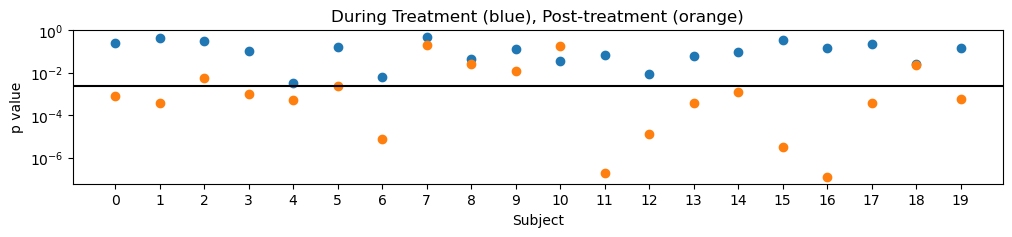

In [12]:
# Plot the spiking from an example neuron.
plt.figure(figsize=(12, 2))
l1 = plt.semilogy(p_value_during, 'o')
#plt.xlabel('Subject'); plt.ylabel('p value'); plt.title('During Treatment')
#plt.figure(figsize=(12, 2))
l2 = plt.semilogy(p_value_post, 'o')
plt.axhline(y=0.05/20, color='k')
plt.xticks(np.arange(0,20));
plt.xlabel('Subject'); plt.ylabel('p value');
plt.title('During Treatment (blue), Post-treatment (orange)');

<div class="alert alert-block alert-success">

**Q:** For each subject, compare the p-values during treatment versus post-treatment. What do you observe?

**A:** We oberve a post-treatment effect in many subjects (the p-value is small), but not during treatment (the p-value is big).

</div>

So far, we've used the spindle measurements to test a null hypothesis and compute p-values.

Now, let's return to the spindle measurements and look at those values directly.

<div class="alert alert-block alert-success">

**Q:** Given our analysis of the p-values, how do you expect the spindle measurements behave during treatment and post-treatment?

**A:** 
- Because we do not find significnat p-values during treatment, I expect these values to appear near 0.
- Because we do find significnt p-values post-treatment, I expect these values to differ from 0.

</div>

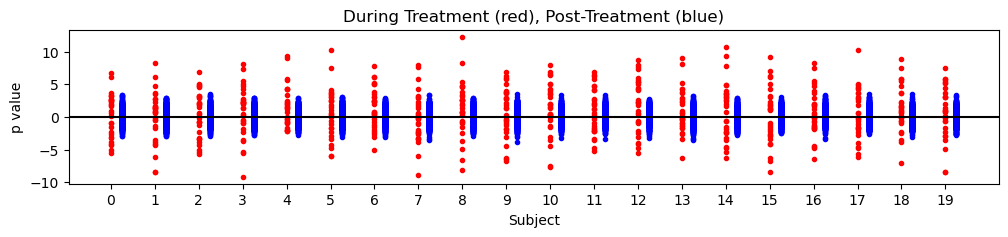

In [13]:
# Plot the spiking from an example neuron.
plt.figure(figsize=(12, 2))
for k in np.arange(0,20):
    plt.plot(np.tile(k,(30,1)), during_treatment[:,k], '.', color='r')
for k in np.arange(0,20):
    plt.plot(np.tile(k,(840,1))+0.25, post_treatment[:,k], '.', color='b')
plt.axhline(y=0, color='k')
#plt.plot(during_treatment);
plt.xlabel('Subject'); plt.ylabel('p value'); plt.title('During Treatment (red), Post-Treatment (blue)'); #plt.ylim([0,1]);
plt.xticks(np.arange(0,20));

<div class="alert alert-block alert-success">

**Q:** Looking at the plots of spindle measurements, what do you observe? More specifically:
1. Do you observe an effect during treatment?
2. Do you obesrve an effect post-treatment?
3. Are these plots consistent with you p-value results?

**A:** 
1. Yes, sort of ... the spindle measurements during treatment appear larger than post-treatment. How can that be if the p-values are big?
2. Not really ... because we  find significnt p-values post-treatment, I expect these values to differ from 0. But I don't see that here ...
3. Not really ... we concluded that there's an effect post-treamtnet, but not during treatment. However, these plots of spindle measurements aren't consistent with our conclusions.

</div>

It's nice to visualize all of the data, but doing so can also be overwhelming.

Let's summarize the spindle measurements in for each subject by ploting the [mean and the standard error of the mean](https://mark-kramer.github.io/Case-Studies-Python/02.html#cis-m1).

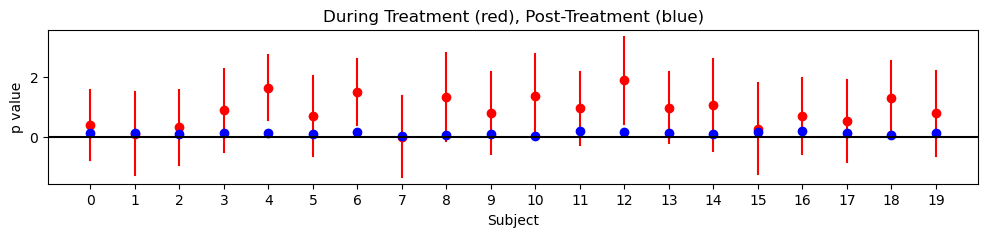

In [14]:
# Plot the spiking from an example neuron.
plt.figure(figsize=(12, 2))
for k in np.arange(0,20):
    mn = np.mean(during_treatment[:,k]);
    sd = np.std( during_treatment[:,k]);
    K  = np.shape(during_treatment)[0];
    plt.plot(k, mn, 'o', color='r')
    plt.plot([k,k], [mn-2*sd/np.sqrt(K), mn+2*sd/np.sqrt(K)], color='r')
for k in np.arange(0,20):
    mn = np.mean(post_treatment[:,k]);
    sd = np.std( post_treatment[:,k]);
    K  = np.shape(post_treatment)[0];
    plt.plot(k, mn, 'o', color='b')
    plt.plot([k,k], [mn-2*sd/np.sqrt(K), mn+2*sd/np.sqrt(K)], color='b')
plt.axhline(y=0, color='k')
plt.xlabel('Subject'); plt.ylabel('p value'); plt.title('During Treatment (red), Post-Treatment (blue)');
plt.xticks(np.arange(0,20));

<div class="alert alert-block alert-success">

**Q:** Looking at the summary plots of spindle measurement means and standard error of the means for each subject, what do you observe? More specifically:
1. Do you observe an effect during treatment?
2. Do you obesrve an effect post-treatment?
3. Are these plots consistent with you p-value results?

**A:** 
1. Yes ... the spindle measurements during treatment appear larger than post-treatment. How can that be if the p-values are big during treatement?
2. Not really ... because we find significnt p-values post-treatment, I expect these values to differ from 0. But I don't see that here ...
3. Not really ... we concluded that there's an effect post-treamtnet, but not during treatment. However, these plots of spindle measurements aren't consistent with our conclusions.

</div>

Let's summarize what we've found so far:

- During treatment, p>0.05 (not significant), but mean spindle measurements > 0.
- Post-treamtnet, p<<0.05  (signficiant), but mean spindle measurements $\approx$ 0.

Something's not adding up here ...

- Why do the spindle values during treatment appear above 0, but p>0.05?
- And, why are the post-treatment spindle measurements so small (near 0), but p<<0.05?

Looking at the spindle rate plots, we observe: the mean spindle rate during treatment often exceeds the mean spindle rate post-treatment.

That's the oppostive conclusion we made from the p-values!

Hmm ... we better think carefully about the paper title ...

<div class="alert alert-block alert-info">

*Moment of tension*:

- Post-treatment, the effect size is small but p<<0.05. How can this be?

</div>

## 5- A different test … a different result.


Let's step back and consider a different null hypothesis:

- no difference in mean spindle rate during treatment vs post-treatment.

To test this null hypothesis, we'll apply a different test:

- a subject specific two-sample t-test.

In [15]:
result = stats.ttest_ind(during_treatment, post_treatment, alternative='greater')
p_value_during_vs_post = result.pvalue
for k in np.arange(0,20):
    print('Subject ', k, ', p=', np.array2string(p_value_during_vs_post[k], precision=4))

Subject  0 , p= 0.0919
Subject  1 , p= 0.5414
Subject  2 , p= 0.1548
Subject  3 , p= 0.0004
Subject  4 , p= 6.5035e-14
Subject  5 , p= 0.0032
Subject  6 , p= 2.7439e-11
Subject  7 , p= 0.5422
Subject  8 , p= 2.9371e-08
Subject  9 , p= 0.0007
Subject  10 , p= 2.4149e-09
Subject  11 , p= 0.0002
Subject  12 , p= 9.3549e-15
Subject  13 , p= 9.3296e-05
Subject  14 , p= 2.7431e-05
Subject  15 , p= 0.3067
Subject  16 , p= 0.0092
Subject  17 , p= 0.0417
Subject  18 , p= 1.0349e-08
Subject  19 , p= 0.0018


<div class="alert alert-block alert-success">

**Q:** Interpret these p-value results in terms of the null hypothesis.

**A:** We conclude that, in most cases, we reject the null hypothesis of no difference in spindle rate. We conclude that the spindle rate is higher during treatment compared to post-treatment in most subjects.

</div>

<div class="alert alert-block alert-success">

**Q:** Compare the results of these tests for each human to the results in Mini 2.

**A:** In Mini 2, we computed 2 p-values for each subject (during and post-treatment). Now, we compute 1 p-value for each subject. These are different tests.

</div>

## 6- So, what went wrong?

(PENDING): effect size

## 7- One test to rule them all: an omnibus test.

(PENDING)

## 8- Beyond p-values: estimate what you care about.


(PENDING): estimate effect size during & post, and compare.

## 9- Summary